<a href="https://colab.research.google.com/github/Nielspace/Netpuneai-Tutorials/blob/main/Overfitting_Vs_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Model Basics


In [2]:
true_f = lambda X: np.cos(3.5 * np.pi * X)

In [3]:
X = np.sort(np.random.rand(100))

In [4]:
y = true_f(X) + np.random.randn(100) * 0.1

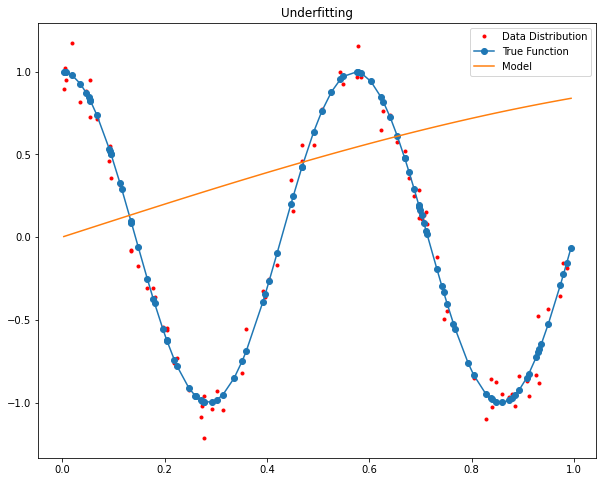

In [7]:
plt.figure(figsize=(10,8))
plt.plot(X,y,'r.', label='Data Distribution')
plt.plot(X, true_f(X), '-o', label='True Function')
plt.plot(X, np.sin(X),label='Model' )
plt.title("Underfitting")
plt.legend()
plt.show()

## Model Capacity


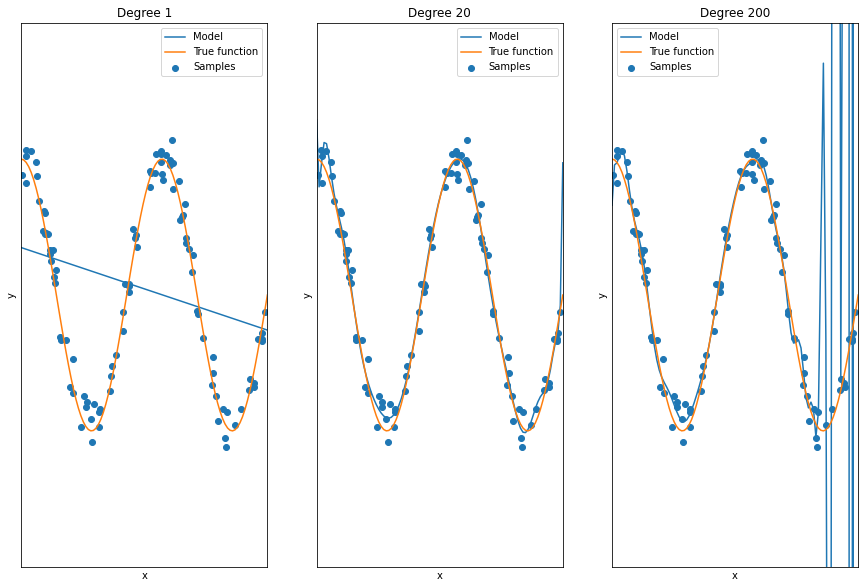

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


np.random.seed(0)

n_samples = 100

degrees = [1, 20, 200]

true_fun = lambda X: np.cos(3.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(15, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                include_bias=False)
    linear_regression = LinearRegression()

    #creating a structure for operation
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                            ("linear_regression", linear_regression)])
    '''
    fitting the model create parameters'''
    pipeline.fit(X[:, np.newaxis], y)


    #Testing
    X_test = np.linspace(0, 1, 100)
    
    yhat = pipeline.predict(X_test[:, np.newaxis])
    plt.plot(X_test, yhat,label="Model")





    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree %d" % degrees[i])
plt.show()


# Overfitting in Decision Tree

In [68]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [70]:
from sklearn.ensemble import RandomForestRegressor

tree_reg1 = RandomForestRegressor(random_state=42, max_depth=2)
tree_reg2 = RandomForestRegressor(random_state=42, max_depth=3)

tree_reg3 = RandomForestRegressor(random_state=42, max_depth=5)
tree_reg4 = RandomForestRegressor(random_state=42, max_depth=12)


tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)
tree_reg3.fit(X_train, y_train)
tree_reg4.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [71]:
train_accuracy1 = tree_reg1.score(X_train, y_train)
test_accuracy1 = tree_reg1.score(X_test, y_test)

train_accuracy2 = tree_reg2.score(X_train, y_train)
test_accuracy2 = tree_reg2.score(X_test, y_test)

train_accuracy3 = tree_reg3.score(X_train, y_train)
test_accuracy3 = tree_reg3.score(X_test, y_test)

train_accuracy4 = tree_reg4.score(X_train, y_train)
test_accuracy4 = tree_reg4.score(X_test, y_test)

In [72]:
print('The training and testing scores of Tree 1: {} and {},\nThe training and testing scores of Tree 2: {} and {},\nThe training and testing scores of Tree 3: {} and {},\nThe training and testing scores of Tree 4: {} and {}'.format(
      train_accuracy1, test_accuracy1, train_accuracy2, test_accuracy2, train_accuracy3, test_accuracy3, train_accuracy4, test_accuracy4))

The training and testing scores of Tree 1: 0.8404706508802431 and 0.8271678098048861,
The training and testing scores of Tree 2: 0.9013665850703529 and 0.879632532827597,
The training and testing scores of Tree 3: 0.9434707911694621 and 0.8885822581538116,
The training and testing scores of Tree 4: 0.9796489237294995 and 0.9013417411602334


In [75]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold

fold = KFold(n_splits=5, shuffle=True, random_state=42)


for index, (train, test) in enumerate(fold.split(X_train,y_train)):
    X_train_folds = X_train[train]
    y_train_folds = y_train[train]

    X_test_folds = X_train[test]
    y_test_folds = y_train[test]

    tree_reg1.fit(X_train_folds, y_train_folds)
    tree_reg2.fit(X_train_folds, y_train_folds)
    tree_reg3.fit(X_train_folds, y_train_folds)
    tree_reg4.fit(X_train_folds, y_train_folds)


    print(f'Fold {index + 1}')
    print('Accuracy Comparison on the tree 1 : ', tree_reg1.score(X_train_folds, y_train_folds), tree_reg1.score(X_test_folds, y_test_folds))
    print('Accuracy Comparison on the tree 2 : ', tree_reg2.score(X_train_folds, y_train_folds), tree_reg2.score(X_test_folds, y_test_folds))
    print('Accuracy Comparison on the tree 3 : ', tree_reg3.score(X_train_folds, y_train_folds), tree_reg3.score(X_test_folds, y_test_folds))
    print('Accuracy Comparison on the tree 4 : ', tree_reg4.score(X_train_folds, y_train_folds), tree_reg4.score(X_test_folds, y_test_folds))
    print('')

Fold 1
Accuracy Comparison on the tree 1 :  0.8461807563035811 0.7132807122815734
Accuracy Comparison on the tree 2 :  0.9040656173830424 0.800243103343233
Accuracy Comparison on the tree 3 :  0.9427270754662905 0.8957989254894059
Accuracy Comparison on the tree 4 :  0.9772310024518541 0.8399632419519342

Fold 2
Accuracy Comparison on the tree 1 :  0.8518383351106282 0.8332687416043213
Accuracy Comparison on the tree 2 :  0.9065531019247325 0.8640799058961013
Accuracy Comparison on the tree 3 :  0.9456926316142141 0.87854321920786
Accuracy Comparison on the tree 4 :  0.9759744986518032 0.8566197625543844

Fold 3
Accuracy Comparison on the tree 1 :  0.841873555443225 0.8340640846721475
Accuracy Comparison on the tree 2 :  0.8985746427532019 0.8925312079045372
Accuracy Comparison on the tree 3 :  0.9404719962699449 0.92126228669534
Accuracy Comparison on the tree 4 :  0.9773865954413155 0.9167905028981888

Fold 4
Accuracy Comparison on the tree 1 :  0.851141096099458 0.7972259803710002
A

In [76]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [77]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [79]:
params = {'max_depth':np.arange(1,11)}

scoring_fnc = make_scorer(performance_metric)
regressor_tree = RandomForestRegressor(random_state=42)
grid = GridSearchCV(estimator=regressor_tree,param_grid=params,cv=5,scoring=scoring_fnc)

In [80]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [81]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [67]:
grid.score(X_train, y_train), grid.score(X_test, y_test)

(0.9362060956890205, 0.869792580626939)

# How to avoid overfitting?

1. 